In [551]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



In [1191]:
t = pd.read_csv("soluciones.csv")
s = pd.read_csv("gonzalo.csv")
g=pd.read_csv("gabi.csv")
gmcd=pd.read_csv("gabimcd.csv")
gvmc=pd.read_csv("gabivmc.csv")

In [1192]:
t=t.sort_values('n')
s=s.sort_values('n')
g=g.sort_values('n')
gmcd=gmcd.sort_values('n')
gvmc=gvmc.sort_values('n')

t['dist-costo']=t["costo-sol"]-t["costo-opt"]
t['dist-k']=t["k-sol"]-t["k-opt"]
t['porc-desvio-costo']=(t["costo-sol"]-t['costo-opt'])*100/t["costo-opt"]
s['dist-k']=s["k-sol"]-s["k-opt"]
s['dist-costo']=s['costo-sol']-s['costo-opt']
s['porc-desvio-costo']=(s["costo-sol"]-s['costo-opt'])*100/s["costo-opt"]
g['dist-k']=g["k-sol"]-g["k-opt"]
g['dist-costo']=g['costo-sol']-g['costo-opt']
g['porc-desvio-costo']=(g["costo-sol"]-g['costo-opt'])*100/g["costo-opt"]
gmcd['dist-k']=gmcd["k-sol"]-gmcd["k-opt"]
gmcd['dist-costo']=gmcd['costo-sol']-gmcd['costo-opt']
gmcd['porc-desvio-costo']=(gmcd["costo-sol"]-gmcd['costo-opt'])*100/gmcd["costo-opt"]

gvmc['dist-k']=gvmc["k-sol"]-gvmc["k-opt"]
gvmc['dist-costo']=gvmc['costo-sol']-gvmc['costo-opt']
gvmc['porc-desvio-costo']=(gvmc["costo-sol"]-gvmc['costo-opt'])*100/gvmc["costo-opt"]


In [1194]:
gvmc=gvmc.sort_values('porc-desvio-costo')
s

,Instancia,n,capacidad-camion,k-opt,costo-opt,Algoritmo,costo-sol,k-sol,tiempo,dist-k,dist-costo,porc-desvio-costo
28,P-n16-k8,16,35,8,450,SWEEP,556.957,10,49.000,2,106.957,23.768222
29,P-n20-k2,20,160,2,216,SWEEP,305.400,3,46.000,1,89.400,41.388889
30,P-n22-k2,22,160,2,216,SWEEP,254.961,2,64.000,0,38.961,18.037500
17,E-n22-k4,22,6000,4,375,SWEEP,481.504,4,58.000,0,106.504,28.401067
18,E-n23-k3,23,4500,3,569,SWEEP,697.365,3,102.000,0,128.365,22.559754
31,P-n23-k8,23,40,8,529,SWEEP,660.120,10,53.000,2,131.120,24.786389
19,E-n30-k3,30,4500,3,534,SWEEP,584.812,3,84.000,0,50.812,9.515356
7,B-n31-k5,31,100,5,672,SWEEP,713.485,5,78.000,0,41.485,6.173363
0,A-n32-k5,32,100,5,784,SWEEP,1098.650,5,76.000,0,314.650,40.133929
8,B-n34-k5,34,100,5,788,SWEEP,942.510,6,86.000,1,154.510,19.607868


c:\users\diego\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


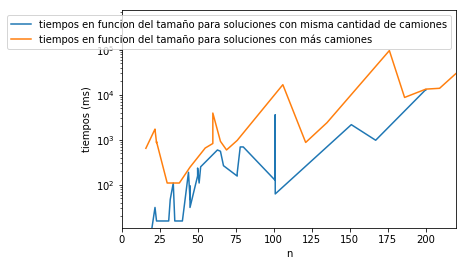

55

In [1115]:

d1 = []
d2=[]
for i in range(len(t)):
    if(t['dist-k'][i] ==0):
        d1.append({'instancia':t['Instancia'][i],'tiempo':t['tiempo'][i],'n':t['n'][i]})
for i in range(len(t)):
    if(t['dist-k'][i] >=1):
        d2.append({'instancia':t['Instancia'][i],'tiempo':t['tiempo'][i],'n':t['n'][i]})
d1 = pd.DataFrame(d1)
d2 = pd.DataFrame(d2)
d1=d1.sort_values('n')
d2=d2.sort_values('n')
plt.yscale('log')
ax=plt.plot(d1['n'],d1['tiempo'])
plt.plot(d2['n'],d2['tiempo'])
to= pow(15,5)
plt.xlabel("n")
plt.ylabel('tiempos (ms)')
plt.axis([0,220,0,to])
plt.legend(['tiempos en funcion del tamaño para soluciones con misma cantidad de camiones',"tiempos en funcion del tamaño para soluciones con más camiones"])
plt.show()
len(t)

Text(0.5,0,'')

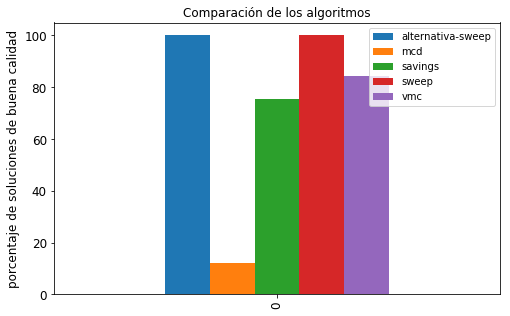

In [1181]:
tacum=0
savacum=0
mcdacum=0
vmcacum=0
sweepacum=0

tk = 100
tp = 80

for i in range(len(t)):
    if((t['porc-desvio-costo'][i]<=tp) and (t['dist-k'][i]<=tk)):
        tacum = tacum+1
        
for i in range(len(s)):
    if(s['porc-desvio-costo'][i]<=tp and s['dist-k'][i]<=tk):
        sweepacum = sweepacum+1
        
for i in range(len(gmcd)):
    if(gmcd['porc-desvio-costo'][i]<=tp and gmcd['dist-k'][i]<=tk):
        mcdacum = mcdacum+1

for i in range(len(gvmc)):
    if(gvmc['porc-desvio-costo'][i]<=tp and gvmc['dist-k'][i]<=tk):
        vmcacum = vmcacum+1
        
for i in range(len(g)):
    if(g['porc-desvio-costo'][i]<=tp and g['dist-k'][i]<=tk):
        savacum = savacum+1
        
tacum = tacum/len(t)*100
sweepacum = sweepacum/len(s)*100
mcdacum = mcdacum/len(gmcd)*100
vmcacum = vmcacum/len(gvmc)*100
savacum= savacum/len(g)*100
df=[]
df = [({'alternativa-sweep':tacum,'sweep':sweepacum,'savings':savacum,'vmc':vmcacum,'mcd':mcdacum})]
df=pd.DataFrame(df)
ax = df.plot(kind='bar', title ="Comparación de los algoritmos", figsize=(8, 5), legend=True, fontsize=12)
ax.set_ylabel("porcentaje de soluciones de buena calidad", fontsize=12)
ax.set_xlabel("")

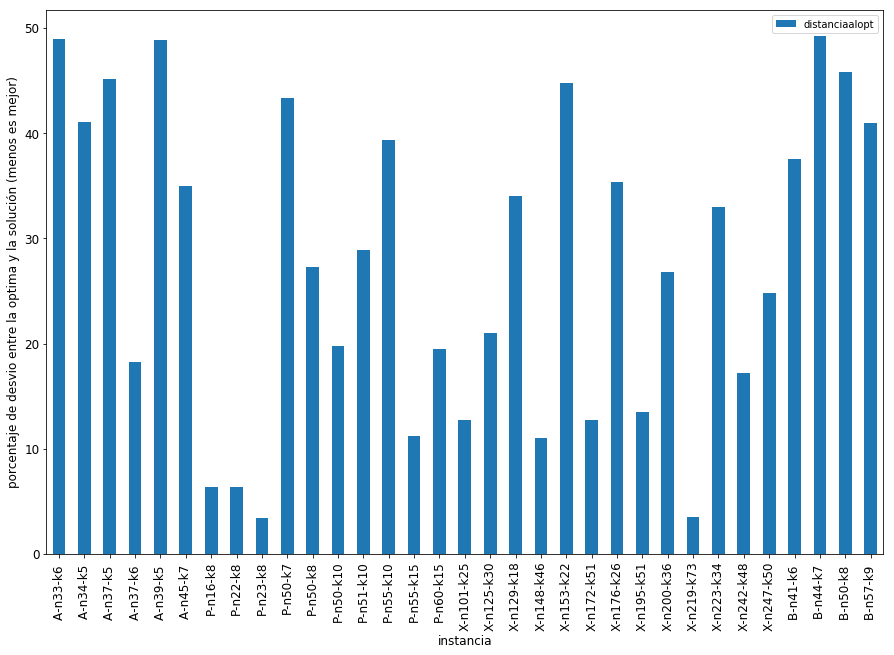

0

In [1092]:
acum_dif_costo=0
cant_desvio=0

for i in range(len(t)):
    acum_dif_costo+=t['dist-costo'][i]
    if(t['porc-desvio-costo'][i]>=20):
        cant_desvio += 1
prom_dif_costo = acum_dif_costo/len(t)
cant_desvio

buenacalidadg=[]
malacalidadg=[]
buenacalidadsavings=[]
buenacalidadd=[]
malacalidadd=[]
malrutd=0

bcmcd =[]


for i in range(len(g)):  
    if(g['porc-desvio-costo'][i] <= 50):
        buenacalidadsavings.append({'n':g['n'][i],'Instancia' : g['Instancia'][i],'distanciaalopt' : g['porc-desvio-costo'][i], 'tiempo': g['tiempo'][i]})
buenacalidadsavings=pd.DataFrame(buenacalidadsavings)


for i in range(len(gmcd)):
    if(gmcd['porc-desvio-costo'][i] <= 50 and (gmcd['k-sol'][i]==gmcd['k-opt'][i])):
        bcmcd.append({'n':gmcd['n'][i],'Instancia' : gmcd['Instancia'][i],'distanciaalopt' : gmcd['porc-desvio-costo'][i], 'tiempo': gmcd['tiempo'][i]})
bcmcd=pd.DataFrame(bcmcd)



#calidad = pd.concat([t['Instancia'],t['porc-desvio-costo']],axis=1)
for i in range(len(t)):
    if(t['porc-desvio-costo'][i] <= 25 and (t['k-sol'][i]==t['k-opt'][i])):
        buenacalidadd.append({'n':t['n'][i],'Instancia' : t['Instancia'][i],'distanciaalopt' : t['porc-desvio-costo'][i], 'tiempo': t['tiempo'][i]})
    else:
        if(t['k-sol'][i]==t['k-opt'][i]):
            malacalidadd.append({'n':t['n'][i],'Instancia' : t['Instancia'][i],'distanciaalopt' : t['porc-desvio-costo'][i], 'tiempo': t['tiempo'][i]})
        else:
            malrutd =malrutd+1
            #malrutd.append({'n':s['n'][i],'Instancia' : s['Instancia'][i],'distanciaalopt' : s['porc-desvio-costo'][i],'distk':s['k-sol'][i] ,'tiempo': s['tiempo'][i]})
buenacalidadd = pd.DataFrame(buenacalidadd)
malacalidadd = pd.DataFrame(malacalidadd)
malrutg=0

for i in range(len(s)):
    if(s['porc-desvio-costo'][i] <= 25 and (s['k-sol'][i]==s['k-opt'][i])):
        buenacalidadg.append({'n':s['n'][i],'Instancia' : s['Instancia'][i],'distanciaalopt' : s['porc-desvio-costo'][i], 'tiempo': s['tiempo'][i]})
    else:
        if(s['k-sol'][i]==s['k-opt'][i]):
            malacalidadg.append({'n':s['n'][i],'Instancia' : s['Instancia'][i],'distanciaalopt' : s['porc-desvio-costo'][i], 'tiempo': s['tiempo'][i]})
        else:
            malrutg = malrutg +1
            #malrutg.append({'n':s['n'][i],'Instancia' : s['Instancia'][i],'distanciaalopt' : s['porc-desvio-costo'][i],'distk':s['k-sol'][i],'tiempo': s['tiempo'][i]})
buenacalidadg = pd.DataFrame(buenacalidadg)
malacalidadg = pd.DataFrame(malacalidadg)

ax = buenacalidadsavings[['distanciaalopt']].plot(kind='bar', title ="", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xticklabels(buenacalidadsavings['Instancia'])
ax.set_xlabel("instancia", fontsize=12)
ax.set_ylabel("porcentaje de desvio entre la optima y la solución (menos es mejor)", fontsize=12)
plt.show()
buenacalidadsavings
len(bcmcd)

In [1074]:
#ax = buenacalidadsavings[['distanciaalopt']].plot(kind='bar', title ="", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xticklabels(buenacalidadd['Instancia'])
ax.set_xlabel("instancia", fontsize=12)
ax.set_ylabel("porcentaje de desvio entre la optima y la solución (menos es mejor)", fontsize=12)
plt.show()
#ax = malacalidadd[['distanciaalopt']].plot(kind='bar', title ="", figsize=(15, 10), legend=True, fontsize=12)
ax.set_xticklabels(malacalidadd['Instancia'])
ax.set_xlabel("instancia", fontsize=12)
ax.set_ylabel("porcentaje de desvio entre la optima y la solución (menos es mejor)", fontsize=12)
buenacalidadsavings

,Instancia,distanciaalopt,n,tiempo
0,A-n33-k6,48.954915,33,0.413808
1,A-n34-k5,41.029598,34,0.446931
2,A-n37-k5,45.181526,37,0.515215
3,A-n37-k6,18.248752,37,0.604745
4,A-n39-k5,48.888757,39,0.645984
5,A-n45-k7,34.969237,45,1.459535
6,P-n16-k8,6.389665,16,0.111787
7,P-n22-k8,6.338926,22,0.175808
8,P-n23-k8,3.444282,23,0.186032
9,P-n50-k7,43.337821,50,1.038625


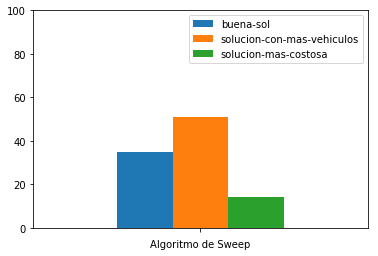

In [823]:
porcentajes_gonzalo=[]
porcentajes_gonzalo.append({'buena-sol':(len(buenacalidadg)*100/len(s)), 'solucion-mas-costosa': (len(malacalidadg)*100/len(s)),'solucion-con-mas-vehiculos':((malrutg)*100/len(s)) })
porcentajes_gonzalo=pd.DataFrame(porcentajes_gonzalo)

porcentajes_diego=[]
porcentajes_diego.append({'buena-sol':(len(buenacalidadd)*100/len(t)), 'solucion-mas-costosa': (len(malacalidadd)*100/len(t)),'solucion-con-mas-vehiculos':(malrutd)*100/len(t) })
porcentajes_diego=pd.DataFrame(porcentajes_diego)
porcentajes_diego
ax=porcentajes_gonzalo.plot(kind='bar')
ax.set_xticklabels('')
ax.set_xlabel('Algoritmo de Sweep')
ax.axis([-0.5,.5,0,100])

plt.show()

Text(0,0.5,'Costo')

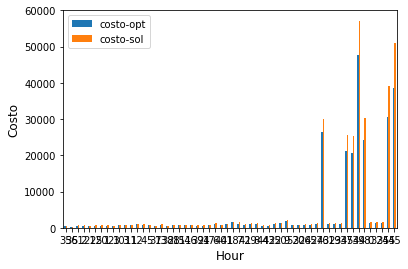

In [561]:
tabla = pd.concat([t['costo-opt'],t['costo-sol']],axis=1)
tabla
ax=tabla.plot.bar(rot=0)
ax.set_xlabel("Hour", fontsize=12)
ax.set_ylabel("Costo", fontsize=12)


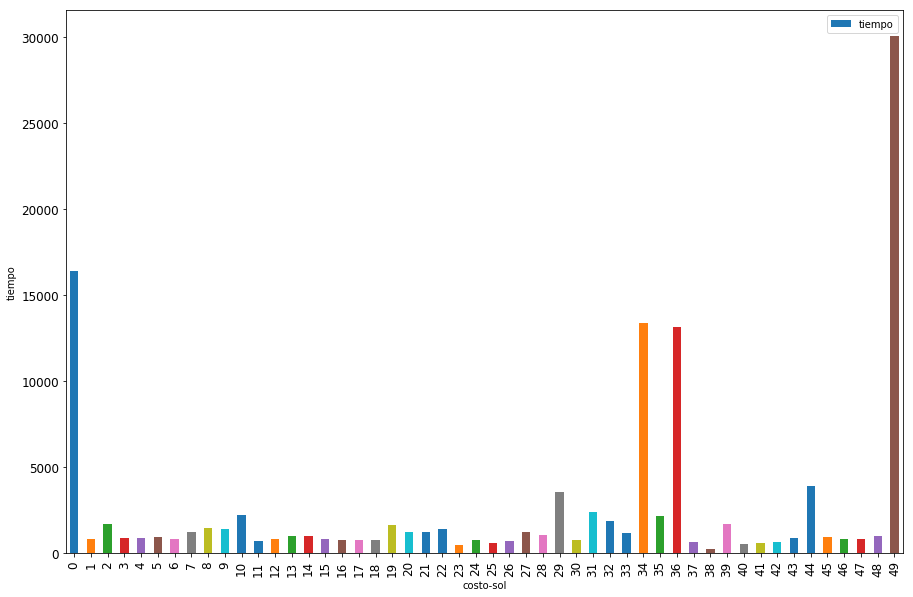

In [452]:
ax=t.plot(x='costo-opt', y='tiempo', kind='bar', title ="", figsize=(15, 10), legend=True, fontsize=12)
ax=t['costo-sol'].plot(ax=ax , kind='bar')
ax.set_ylabel("tiempo")
ax.set_xlabel("costo-sol")
plt.show()

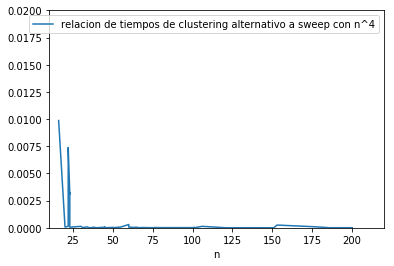

In [489]:

#plt.plot(t['n'],t['tiempo'])
vec_difs=[]
#plt.ylabel("tiempo ms")
#plt.ylabel("t / n^3")
plt.xlabel("n")
plt.axis([10,220,0,0.02])
vec_difs = t['k-sol'] - t['k-opt'] 
vec_difs
rel_n_k = t['n']/t['k-sol']
t['rel-entre-n-y-k'] = rel_n_k
#t= t.drop(columns=['dist-entre-k'])
vec_cub=t['n']*t['n']*t['n']*t['n']
vec_cub
tdf = pd.DataFrame(t['tiempo'])
rel = t['tiempo']/vec_cub
rel = pd.DataFrame(rel)
plt.plot(t['n'],rel)
plt.legend(['relacion de tiempos de clustering alternativo a sweep con n^4'])



Text(0,0.5,'tiempos ms')

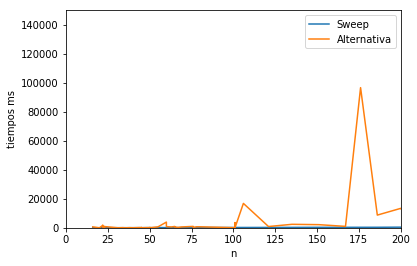

In [615]:
rel2 = gonzalo['tiempo']/t['tiempo']
plt.axis([0,200,0,150000])
plt.plot(gonzalo['n'],gonzalo['tiempo'])
plt.plot(t['n'],t['tiempo'])
plt.legend(['Sweep','Alternativa'])
plt.xlabel("n")
plt.ylabel("tiempos ms")